In [1]:
import sys
sys.path.insert(0,'../PLASIM/')
import Learn2_new as ln
ut = ln.ut # utilities
ef = ln.ef # ERA_Fields_New

# log to stdout
import logging
import os
logging.getLogger().level = logging.INFO
logging.getLogger().handlers = [logging.StreamHandler(sys.stdout)]

# set spacing of the indentation
ut.indentation_sep = '  '

In this environment you cannot import Basemap
Could not import sliding_window_view from np.lib.stride_tricks. Using custom copy for numpy<1.20
Could not load field_infos: using the hardcoded version


In [9]:
import itertools as its

Months1 = [0, 0, 0, 0, 0, 0, 31, 30, 31, 31, 30, 0, 0, 0] # Because of 3 day running mean we lose 2 days
Tot_Mon1 = list(its.accumulate(Months1))
X, Y, yp, lat, lon = ln.prepare_data(**ut.set_values_recursive(ln.get_default_params(ln.prepare_data, recursive=True),
                                            {'fields': ['t2m','zg500','mrso'], 'year_list' : 'range(10)', 'mylocal' : '/net/nfs/ssd1/gmiloshe/Data/CESM/', 
                                            'time_start' : Tot_Mon1[6], 'time_end' : Tot_Mon1[9], 'fillna' : 0, # Take into account number of days per month in CESM
                                            #'lon_start' : - 288//2, 'lon_end' : 288//2,
                                            'lon_start' : -12, 'lon_end' : 36, 'nfolds' : 2, 'u' : 1,
                                            'lat_end' : 192-40, 'lat_start' : 192-192*60//180, # latitudes start from 90 degrees North Pole
                                            'Model' : 'CESM', 'datafolder' : 'Data_CESM_800yrs', 'dataset_years' : 1000, 'preprefix' : 'North_Anomalies_'}))
LON, LAT = ln.np.meshgrid(lon, lat)

prepare_data:
  load_data:
    Opening field TSA
    First valid path found in /net/nfs/ssd1/gmiloshe/Data/CESM/Data_CESM_800yrs/North_Anomalies_TSA.nc
  load_data:
    Opening field TSA
    First valid path found in /net/nfs/ssd1/gmiloshe/Data/CESM/Data_CESM_800yrs/North_Anomalies_TSA.nc
    monotonize_years:
    monotonize_years: completed in 0.6 s
    The loaded field has 800 years, not 1000 as provided. Setting self.years = 800
    First valid path found in /net/nfs/ssd1/gmiloshe/Data/CESM/Data_CESM/CAM_landmask.nc
    First valid path found in /net/nfs/ssd1/gmiloshe/Data/CESM/Data_CESM/CAM_cellarea.nc
    select_years:
    select_years: completed in 0.3 s
    sort_lat:
    sort_lat: completed in 0.0 s
    select_lonlat:
      Filling missing values with 0
    select_lonlat: completed in 0.1 s
    First valid path found in /net/nfs/ssd1/gmiloshe/Data/CESM/Data_CESM/CAM_landmask.nc
    Failed to create mask with xarray features: using old version with numpy
    Opening field Z3
    

norm = <matplotlib.colors.TwoSlopeNorm object at 0x7f0d602b37f0>


<GeoAxesSubplot:>

<Figure size 900x600 with 0 Axes>

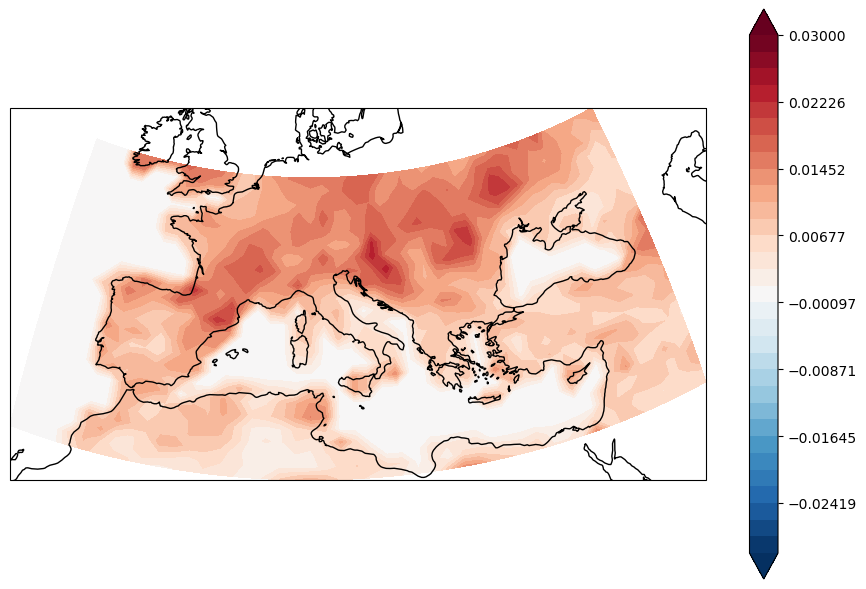

In [10]:
LON, LAT = ln.np.meshgrid(lon, lat)
import cartopy.crs as ccrs
import general_purpose.cartopy_plots as cplt
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(9,6))
cplt.multiple_field_plot2(LON, LAT, np.std(X,0)[...,2:3],projections=[ccrs.Orthographic(10, 55)],
                        fig_num=8, put_colorbar=True, use_norm=False, levs=np.linspace(-0.03,0.03,32),
                        extents=[None, None, (-5, 10, 39, 60)],
                        mode='contourf',draw_labels=False,draw_gridlines=False,
                        )